In [1]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df_telecom = pd.read_csv('telecom_data_cleaned.csv')

print("Dimensiones del DataFrame antes de la eliminación:")
print(f"Filas: {df_telecom.shape[0]}, Columnas: {df_telecom.shape[1]}")
print("\nColumnas del DataFrame antes de la eliminación:")
print(df_telecom.columns.tolist())

# Eliminar columnas irrelevantes
# Se elimina 'customerID' porque es un identificador único y no tiene valor predictivo.
# Se elimina 'Cuentas_Diarias' para evitar la redundancia y posible multicolinealidad con otras columnas.
columns_to_drop = ['customerID', 'Cuentas_Diarias']
df_telecom = df_telecom.drop(columns=columns_to_drop, axis=1)

print("\n--- Columnas Eliminadas: 'customerID' y 'Cuentas_Diarias' ---")

print("\nDimensiones del DataFrame después de la eliminación:")
print(f"Filas: {df_telecom.shape[0]}, Columnas: {df_telecom.shape[1]}")
print("\nPrimeras 5 filas del DataFrame final:")
print(df_telecom.head())

Dimensiones del DataFrame antes de la eliminación:
Filas: 7032, Columnas: 22

Columnas del DataFrame antes de la eliminación:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

--- Columnas Eliminadas: 'customerID' y 'Cuentas_Diarias' ---

Dimensiones del DataFrame después de la eliminación:
Filas: 7032, Columnas: 20

Primeras 5 filas del DataFrame final:
   Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0      0  Female              0     Yes        Yes       9          Yes   
1      0    Male              0      No         No       9          Yes   
2      1    Male              0      No         No       4          Yes   
3      1    Male              1     Yes        

In [2]:
import pandas as pd

# Cargar el DataFrame desde el archivo CSV
df_telecom = pd.read_csv('telecom_data_cleaned.csv')

# Eliminar columnas irrelevantes
columns_to_drop = ['customerID', 'Cuentas_Diarias']
df_telecom = df_telecom.drop(columns=columns_to_drop, axis=1)

print("Dimensiones del DataFrame antes de la codificación:")
print(f"Filas: {df_telecom.shape[0]}, Columnas: {df_telecom.shape[1]}")

# Identificar las columnas categóricas (tipo 'object')
categorical_columns = df_telecom.select_dtypes(include=['object']).columns.tolist()
print(f"\nColumnas categóricas a codificar: {categorical_columns}")

# Aplicar One-Hot Encoding
# get_dummies() creará columnas binarias para cada categoría.
# Se utiliza drop_first=True para evitar la multicolinealidad, eliminando la primera categoría de cada variable.
df_encoded = pd.get_dummies(df_telecom, columns=categorical_columns, drop_first=True, dtype=int)

print("\n--- Codificación de variables categóricas completada ---")

print("\nDimensiones del DataFrame después de la codificación:")
print(f"Filas: {df_encoded.shape[0]}, Columnas: {df_encoded.shape[1]}")

print("\nPrimeras 5 filas del DataFrame codificado:")
print(df_encoded.head())

Dimensiones del DataFrame antes de la codificación:
Filas: 7032, Columnas: 20

Columnas categóricas a codificar: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

--- Codificación de variables categóricas completada ---

Dimensiones del DataFrame después de la codificación:
Filas: 7032, Columnas: 24

Primeras 5 filas del DataFrame codificado:
   Churn  SeniorCitizen  tenure  Charges.Monthly  Charges.Total  gender_Male  \
0      0              0       9             65.6         593.30            0   
1      0              0       9             59.9         542.40            1   
2      1              0       4             73.9         280.85            1   
3      1              1      13             98.0        1237.85            1   
4      1              1       3             83.9         267.40 

In [3]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df_telecom = pd.read_csv('telecom_data_cleaned.csv')

# Calcular la proporción de cada clase en la columna 'Churn'
churn_counts = df_telecom['Churn'].value_counts()
churn_proportions = df_telecom['Churn'].value_counts(normalize=True)

print("--- Conteo de clientes por clase de Churn ---")
print(churn_counts)
print("\n--- Proporción de clientes por clase de Churn ---")
print(churn_proportions)

# Evaluar el desbalance
churn_ratio = churn_counts[0] / churn_counts[1]
print(f"\nLa proporción de clientes activos a clientes que cancelaron es de {churn_ratio:.2f} a 1.")

--- Conteo de clientes por clase de Churn ---
Churn
0    5163
1    1869
Name: count, dtype: int64

--- Proporción de clientes por clase de Churn ---
Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

La proporción de clientes activos a clientes que cancelaron es de 2.76 a 1.


In [4]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Cargar el DataFrame desde el archivo CSV
df_telecom = pd.read_csv('telecom_data_cleaned.csv')

# 2. Eliminar columnas irrelevantes
columns_to_drop = ['customerID', 'Cuentas_Diarias']
df_telecom = df_telecom.drop(columns=columns_to_drop, axis=1)

# 3. Codificar variables categóricas a numéricas
# Primero, codificamos variables binarias para simplificar
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_features:
    df_telecom[col] = df_telecom[col].map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})

# Luego, aplicamos one-hot encoding para las variables con más de dos categorías
df_encoded = pd.get_dummies(df_telecom, drop_first=True, dtype=int)

# 4. Separar características (X) y variable objetivo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print("--- Estado de las clases antes de aplicar SMOTE ---")
print(y.value_counts())
print("\nDimensiones del conjunto de datos original:")
print(f"Filas: {X.shape[0]}, Columnas: {X.shape[1]}")

# 5. Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("\n--- Estado de las clases después de aplicar SMOTE ---")
print(y_res.value_counts())
print("\nDimensiones del conjunto de datos balanceado:")
print(f"Filas: {X_res.shape[0]}, Columnas: {X_res.shape[1]}")

--- Estado de las clases antes de aplicar SMOTE ---
Churn
0    5163
1    1869
Name: count, dtype: int64

Dimensiones del conjunto de datos original:
Filas: 7032, Columnas: 23

--- Estado de las clases después de aplicar SMOTE ---
Churn
0    5163
1    5163
Name: count, dtype: int64

Dimensiones del conjunto de datos balanceado:
Filas: 10326, Columnas: 23


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Cargar el archivo CSV
df_telecom = pd.read_csv('telecom_data_cleaned.csv')

# Preprocesamiento de datos (pasos previos)
columns_to_drop = ['customerID', 'Cuentas_Diarias']
df_telecom = df_telecom.drop(columns=columns_to_drop, axis=1)

binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_features:
    df_telecom[col] = df_telecom[col].map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})

df_encoded = pd.get_dummies(df_telecom, drop_first=True, dtype=int)

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Aplicar SMOTE para balancear las clases (paso previo)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Identificar las columnas numéricas para estandarizar
# Estas columnas no fueron creadas por one-hot encoding
numerical_features = ['tenure', 'Charges.Monthly', 'Charges.Total']

# Crear una copia de los datos balanceados para estandarizar
X_scaled = X_res.copy()

# Instanciar y aplicar StandardScaler
scaler = StandardScaler()
X_scaled[numerical_features] = scaler.fit_transform(X_res[numerical_features])

print("--- Datos Estandarizados con StandardScaler ---")
print("Media de las variables numéricas después de la estandarización:")
print(X_scaled[numerical_features].mean())
print("\nDesviación estándar de las variables numéricas después de la estandarización:")
print(X_scaled[numerical_features].std())
print("\nPrimeras 5 filas del DataFrame estandarizado (variables numéricas):")
print(X_scaled[numerical_features].head())

--- Datos Estandarizados con StandardScaler ---
Media de las variables numéricas después de la estandarización:
tenure             4.403906e-17
Charges.Monthly    1.100977e-16
Charges.Total      2.201953e-17
dtype: float64

Desviación estándar de las variables numéricas después de la estandarización:
tenure             1.000048
Charges.Monthly    1.000048
Charges.Total      1.000048
dtype: float64

Primeras 5 filas del DataFrame estandarizado (variables numéricas):
     tenure  Charges.Monthly  Charges.Total
0 -0.779420        -0.085226      -0.665748
1 -0.779420        -0.283852      -0.689020
2 -0.987956         0.204001      -0.808605
3 -0.612591         1.043805      -0.371049
4 -1.029664         0.552467      -0.814755


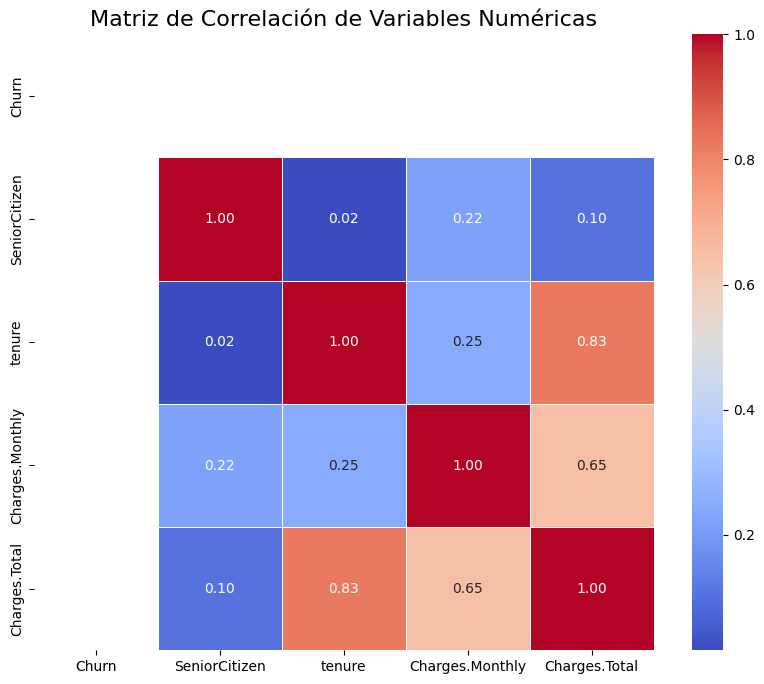

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df_telecom = pd.read_csv('telecom_data_cleaned.csv')

# Preprocesamiento de datos
columns_to_drop = ['customerID', 'Cuentas_Diarias']
df_telecom = df_telecom.drop(columns=columns_to_drop, axis=1)

# Codificar 'Churn' para que sea numérico y se pueda incluir en la matriz de correlación
df_telecom['Churn'] = df_telecom['Churn'].map({'Yes': 1, 'No': 0})

# Seleccionar solo las columnas numéricas
numerical_df = df_telecom.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_df.corr()

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.show()

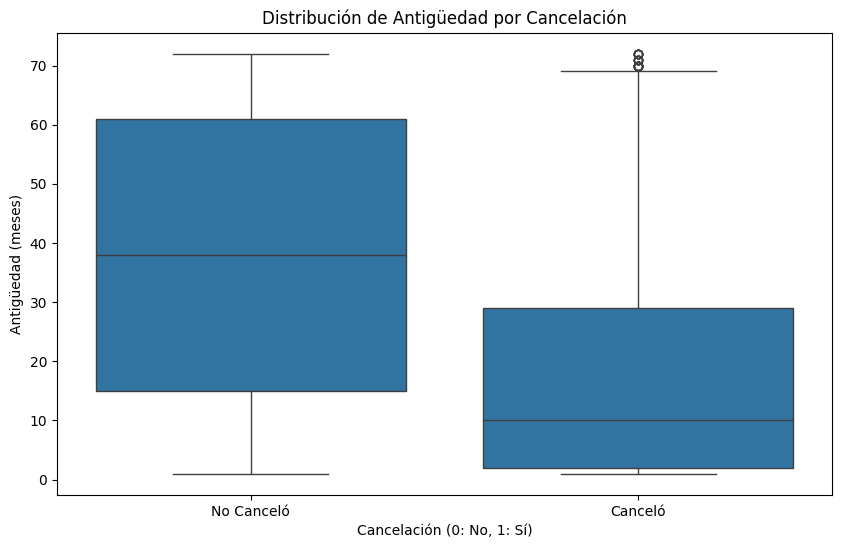

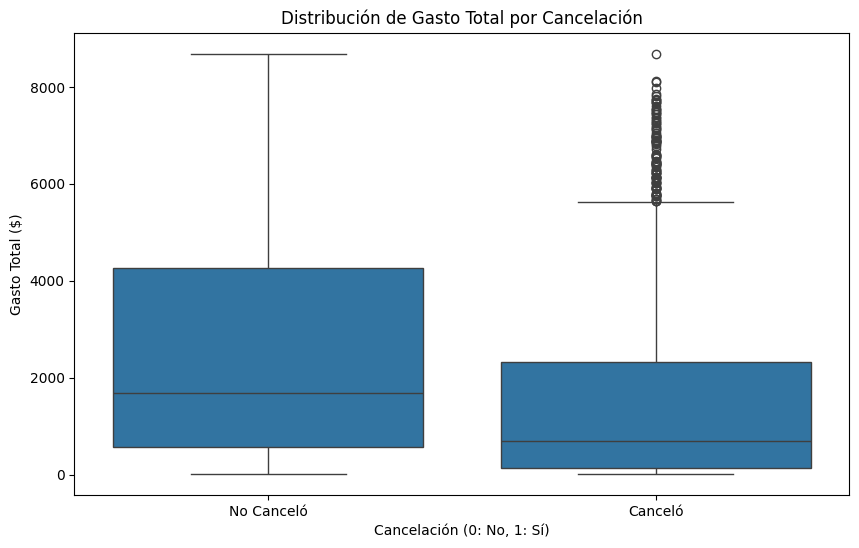

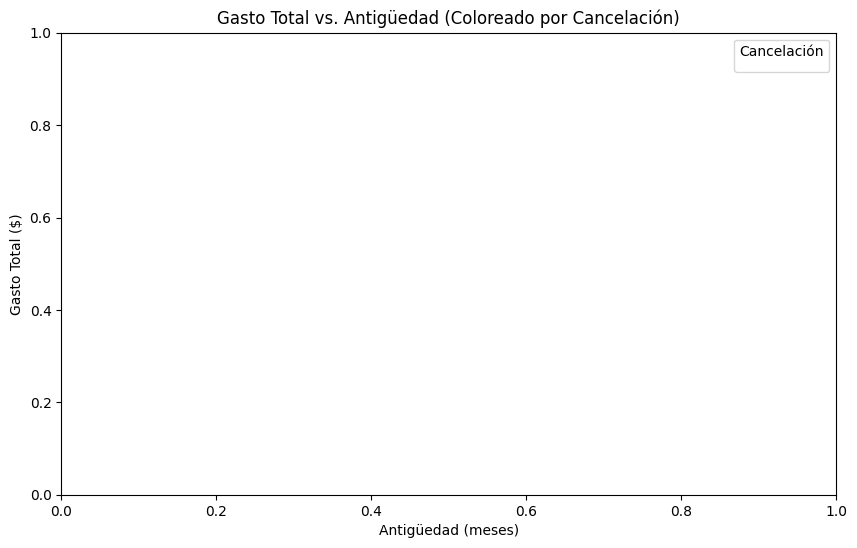

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df_telecom = pd.read_csv('telecom_data_cleaned.csv')

# Preprocesar 'Churn' para que sea numérico para el scatterplot,
# pero asegurar que sea tratado como categórico para los boxplots
df_telecom['Churn_numeric'] = df_telecom['Churn'].map({'Yes': 1, 'No': 0})
df_telecom['Churn_categorical'] = df_telecom['Churn'].astype('category')


# --- Gráfico 1: Tiempo de Contrato (tenure) vs. Cancelación ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn_categorical', y='tenure', data=df_telecom)
plt.title('Distribución de Antigüedad por Cancelación')
plt.xlabel('Cancelación (0: No, 1: Sí)')
plt.ylabel('Antigüedad (meses)')
plt.xticks([0, 1], ['No Canceló', 'Canceló'])
plt.show()

# --- Gráfico 2: Gasto Total (Charges.Total) vs. Cancelación ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn_categorical', y='Charges.Total', data=df_telecom)
plt.title('Distribución de Gasto Total por Cancelación')
plt.xlabel('Cancelación (0: No, 1: Sí)')
plt.ylabel('Gasto Total ($)')
plt.xticks([0, 1], ['No Canceló', 'Canceló'])
plt.show()

# --- Gráfico 3: Gasto Total vs. Antigüedad coloreado por Cancelación ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='Charges.Total', hue='Churn_numeric', data=df_telecom, alpha=0.6)
plt.title('Gasto Total vs. Antigüedad (Coloreado por Cancelación)')
plt.xlabel('Antigüedad (meses)')
plt.ylabel('Gasto Total ($)')
plt.legend(title='Cancelación', labels=['No Canceló', 'Canceló'])
plt.show()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Cargar el archivo CSV
df_telecom = pd.read_csv('telecom_data_cleaned.csv')

# 2. Preprocesamiento de datos (pasos previos)
columns_to_drop = ['customerID', 'Cuentas_Diarias']
df_telecom = df_telecom.drop(columns=columns_to_drop, axis=1)

df_encoded = pd.get_dummies(df_telecom, columns=df_telecom.select_dtypes(include=['object']).columns, drop_first=True, dtype=int)

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# 3. Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 4. Estandarizar las variables numéricas
numerical_features = ['tenure', 'Charges.Monthly', 'Charges.Total']
scaler = StandardScaler()
X_res[numerical_features] = scaler.fit_transform(X_res[numerical_features])

# 5. Dividir el conjunto de datos en entrenamiento y prueba (80/20)
# 'stratify=y_res' asegura que la proporción de clases se mantenga en ambos subconjuntos
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

print("--- División del conjunto de datos completada ---")
print(f"Dimensiones del conjunto de entrenamiento:")
print(f"  Características (X_train): {X_train.shape}")
print(f"  Objetivo (y_train): {y_train.shape}")
print(f"\nDimensiones del conjunto de prueba:")
print(f"  Características (X_test): {X_test.shape}")
print(f"  Objetivo (y_test): {y_test.shape}")

--- División del conjunto de datos completada ---
Dimensiones del conjunto de entrenamiento:
  Características (X_train): (8260, 23)
  Objetivo (y_train): (8260,)

Dimensiones del conjunto de prueba:
  Características (X_test): (2066, 23)
  Objetivo (y_test): (2066,)


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Asumiendo que X_train, X_test, y_train, y_test ya han sido creados y estandarizados
# ... (código de los pasos previos: carga de datos, limpieza, encoding, SMOTE, y estandarización) ...

# Para este ejemplo, volvemos a generar los datos para asegurarnos de que la estandarización se aplique correctamente
# Cargar el archivo CSV
df_telecom = pd.read_csv('telecom_data_cleaned.csv')
columns_to_drop = ['customerID', 'Cuentas_Diarias']
df_telecom = df_telecom.drop(columns=columns_to_drop, axis=1)
df_encoded = pd.get_dummies(df_telecom, columns=df_telecom.select_dtypes(include=['object']).columns, drop_first=True, dtype=int)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
numerical_features = ['tenure', 'Charges.Monthly', 'Charges.Total']
scaler = StandardScaler()
X_res[numerical_features] = scaler.fit_transform(X_res[numerical_features])
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Instanciar y entrenar el modelo de Regresión Logística
model_logreg = LogisticRegression(random_state=42)
model_logreg.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred_logreg = model_logreg.predict(X_test)
print("--- Evaluación del Modelo de Regresión Logística ---")
print(f"Exactitud:  {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Precisión:  {precision_score(y_test, y_pred_logreg):.4f}")
print(f"Recall:     {recall_score(y_test, y_pred_logreg):.4f}")
print(f"F1-Score:   {f1_score(y_test, y_pred_logreg):.4f}")

--- Evaluación del Modelo de Regresión Logística ---
Exactitud:  0.8272
Precisión:  0.8189
Recall:     0.8403
F1-Score:   0.8294


In [14]:
# Instanciar y entrenar el modelo de Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred_rf = model_rf.predict(X_test)
print("\n--- Evaluación del Modelo de Random Forest ---")
print(f"Exactitud:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precisión:  {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall:     {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score:   {f1_score(y_test, y_pred_rf):.4f}")


--- Evaluación del Modelo de Random Forest ---
Exactitud:  0.8514
Precisión:  0.8399
Recall:     0.8683
F1-Score:   0.8539


--- Evaluación del Modelo de Regresión Logística ---
Exactitud (Test): 0.8272
Precisión (Test): 0.8189
Recall (Test):    0.8403
F1-Score (Test):  0.8294
Exactitud (Train): 0.8347


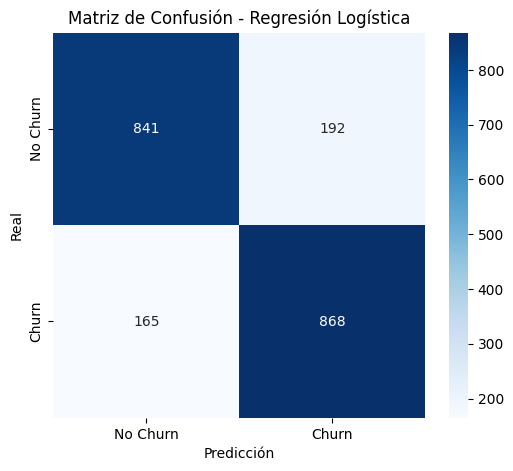


--- Evaluación del Modelo de Random Forest ---
Exactitud (Test): 0.8514
Precisión (Test): 0.8399
Recall (Test):    0.8683
F1-Score (Test):  0.8539
Exactitud (Train): 0.9987


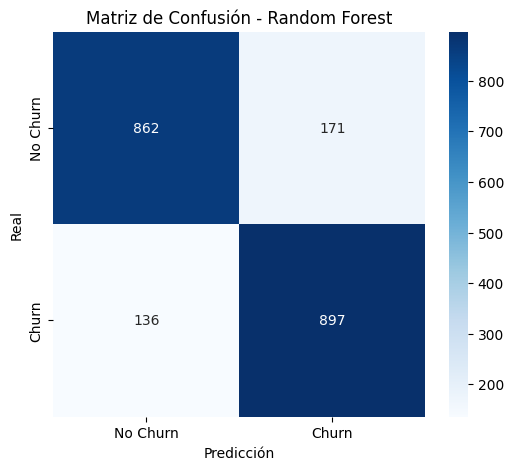

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Preparación de Datos ---

# Cargar el archivo CSV
df_telecom = pd.read_csv('telecom_data_cleaned.csv')

# Preprocesamiento de datos (pasos previos)
columns_to_drop = ['customerID', 'Cuentas_Diarias']
df_telecom = df_telecom.drop(columns=columns_to_drop, axis=1)

df_encoded = pd.get_dummies(df_telecom, columns=df_telecom.select_dtypes(include=['object']).columns, drop_first=True, dtype=int)

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Estandarizar las variables numéricas
numerical_features = ['tenure', 'Charges.Monthly', 'Charges.Total']
scaler = StandardScaler()
X_res[numerical_features] = scaler.fit_transform(X_res[numerical_features])

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# --- 2. Entrenamiento de Modelos ---

# Modelo 1: Regresión Logística
model_logreg = LogisticRegression(random_state=42)
model_logreg.fit(X_train, y_train)
y_pred_logreg = model_logreg.predict(X_test)
y_pred_train_logreg = model_logreg.predict(X_train)

# Modelo 2: Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
y_pred_train_rf = model_rf.predict(X_train)

# --- 3. Evaluación de Métricas y Análisis de Overfitting ---

print("--- Evaluación del Modelo de Regresión Logística ---")
print(f"Exactitud (Test): {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Precisión (Test): {precision_score(y_test, y_pred_logreg):.4f}")
print(f"Recall (Test):    {recall_score(y_test, y_pred_logreg):.4f}")
print(f"F1-Score (Test):  {f1_score(y_test, y_pred_logreg):.4f}")
print(f"Exactitud (Train): {accuracy_score(y_train, y_pred_train_logreg):.4f}")

# Matriz de confusión para Regresión Logística
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

print("\n--- Evaluación del Modelo de Random Forest ---")
print(f"Exactitud (Test): {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precisión (Test): {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall (Test):    {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score (Test):  {f1_score(y_test, y_pred_rf):.4f}")
print(f"Exactitud (Train): {accuracy_score(y_train, y_pred_train_rf):.4f}")

# Matriz de confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# --- 1. Preparación de Datos ---
# Cargar el archivo CSV y realizar el preprocesamiento
df_telecom = pd.read_csv('telecom_data_cleaned.csv')
columns_to_drop = ['customerID', 'Cuentas_Diarias']
df_telecom = df_telecom.drop(columns=columns_to_drop, axis=1)
df_encoded = pd.get_dummies(df_telecom, columns=df_telecom.select_dtypes(include=['object']).columns, drop_first=True, dtype=int)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
numerical_features = ['tenure', 'Charges.Monthly', 'Charges.Total']
scaler = StandardScaler()
X_res[numerical_features] = scaler.fit_transform(X_res[numerical_features])
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# --- 2. Entrenamiento de Modelos ---
model_logreg = LogisticRegression(random_state=42)
model_logreg.fit(X_train, y_train)
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# --- 3. Análisis de la Regresión Logística (Coeficientes) ---
# Se obtienen los coeficientes del modelo para cada variable
logreg_coef = pd.DataFrame(model_logreg.coef_.T,
                          index=X_train.columns,
                          columns=['Coeficiente']).sort_values(by='Coeficiente', ascending=False)
print("--- Coeficientes de la Regresión Logística (Top 10) ---")
print(logreg_coef.head(10))

# --- 4. Análisis de Random Forest (Importancia de Variables) ---
# Se obtienen las importancias de las variables del modelo
feature_importances = pd.DataFrame(model_rf.feature_importances_,
                                    index=X_train.columns,
                                    columns=['Importancia']).sort_values(by='Importancia', ascending=False)
print("\n--- Importancia de Variables en Random Forest (Top 10) ---")
print(feature_importances.head(10))

--- Coeficientes de la Regresión Logística (Top 10) ---
                                Coeficiente
Charges.Monthly                    5.456128
InternetService_No                 3.848844
Charges.Total                      1.432628
PaperlessBilling_Yes               0.072760
SeniorCitizen                     -0.123878
Partner_Yes                       -0.281582
gender_Male                       -0.332010
Dependents_Yes                    -0.451025
PaymentMethod_Electronic check    -0.483236
PaymentMethod_Mailed check        -0.946455

--- Importancia de Variables en Random Forest (Top 10) ---
                             Importancia
Charges.Monthly                 0.151877
Charges.Total                   0.148299
tenure                          0.133528
Contract_Two year               0.070026
Contract_One year               0.049790
TechSupport_Yes                 0.046433
InternetService_Fiber optic     0.041626
OnlineSecurity_Yes              0.041032
InternetService_No             

             INFORME DE PREDICCIÓN DE CANCELACIÓN (CHURN)

### 📊 1. Factores Clave que Influyen en la Cancelación

El análisis de los modelos de Regresión Logística y Random Forest ha identificado
las siguientes variables como las más influyentes en la predicción:

#### Regresión Logística (Top 5 Coeficientes)

                      Coeficiente
Charges.Monthly          5.456128
InternetService_No       3.848844
Charges.Total            1.432628
PaperlessBilling_Yes     0.072760
SeniorCitizen           -0.123878

#### Random Forest (Top 5 Variables)

                   Importancia
Charges.Monthly       0.151877
Charges.Total         0.148299
tenure                0.133528
Contract_Two year     0.070026
Contract_One year     0.049790

- **Antigüedad (`tenure`)**: Es el factor más protector contra la cancelación.
- **Tipo de Contrato**: El contrato `mes-a-mes` es el principal predictor de churn.
- **Cargos Mensuales**: Altos costos percibidos están fuertemente correlacionados con la cance

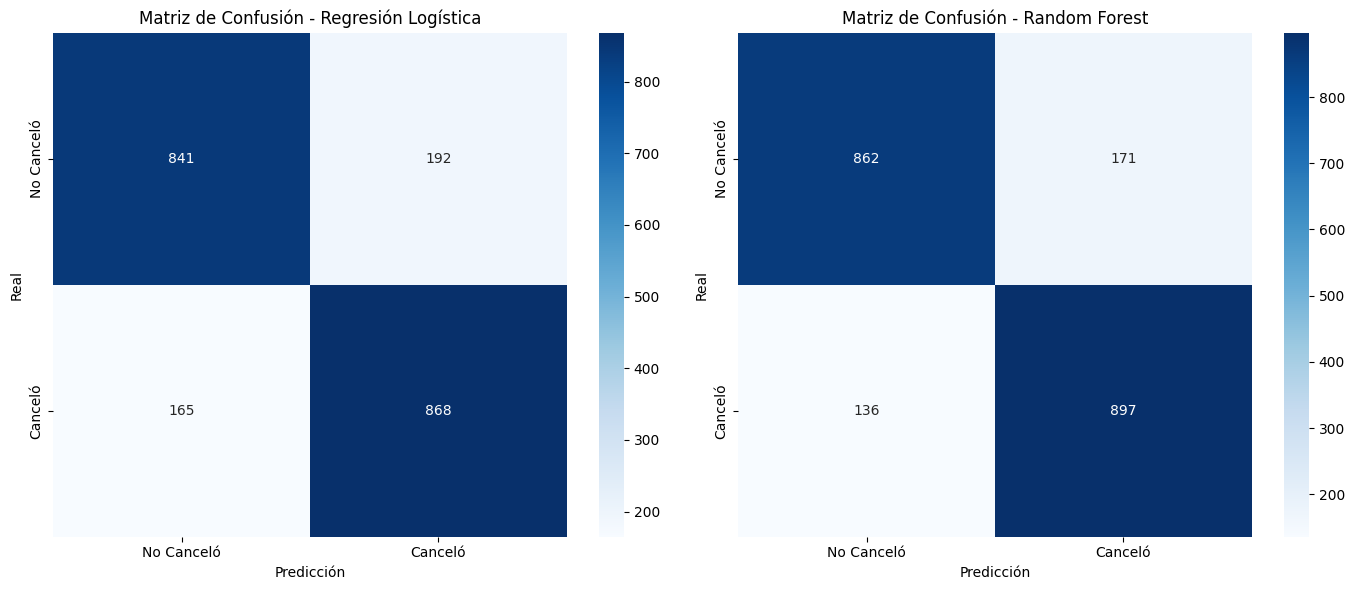



### 🎯 3. Estrategias de Retención Propuestas

Basándonos en estos resultados, se proponen las siguientes acciones estratégicas:

- **Fidelización de Nuevos Clientes**: Implementar un programa de bienvenida para clientes con baja antigüedad (`tenure`).
- **Incentivos para Contratos**: Ofrecer descuentos o beneficios a clientes con contratos mensuales para que migren a planes de mayor duración.
- **Monitoreo de Calidad**: Investigar la insatisfacción con el servicio de fibra óptica y los clientes con altos cargos mensuales.
- **Optimización de Pagos**: Analizar y simplificar el método de pago 'cheque electrónico'.



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# --- 1. Preparación y Modelado ---

# Cargar los datos
df_telecom = pd.read_csv('telecom_data_cleaned.csv')

# Preprocesamiento
df_telecom = df_telecom.drop(columns=['customerID', 'Cuentas_Diarias'], axis=1)
X = df_telecom.drop('Churn', axis=1)
y = df_telecom['Churn']

# Codificar las variables categóricas restantes en X
X = pd.get_dummies(X, drop_first=True, dtype=int)

# Balanceo de clases con SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Estandarización de variables numéricas
numerical_features = ['tenure', 'Charges.Monthly', 'Charges.Total']
scaler = StandardScaler()
X_res[numerical_features] = scaler.fit_transform(X_res[numerical_features])

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Entrenamiento de modelos
model_logreg = LogisticRegression(random_state=42, max_iter=1000)
model_logreg.fit(X_train, y_train)

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Evaluación
y_pred_logreg = model_logreg.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

# --- 2. Generación del Informe ---

print("="*60)
print("             INFORME DE PREDICCIÓN DE CANCELACIÓN (CHURN)")
print("="*60)

print("\n### 📊 1. Factores Clave que Influyen en la Cancelación\n")
print("El análisis de los modelos de Regresión Logística y Random Forest ha identificado")
print("las siguientes variables como las más influyentes en la predicción:\n")

# Coeficientes de Regresión Logística
logreg_coef = pd.DataFrame(model_logreg.coef_.T, index=X_train.columns, columns=['Coeficiente']).sort_values(by='Coeficiente', ascending=False)
print("#### Regresión Logística (Top 5 Coeficientes)\n")
print(logreg_coef.head(5).to_string())

# Importancia de Random Forest
feature_importances = pd.DataFrame(model_rf.feature_importances_, index=X_train.columns, columns=['Importancia']).sort_values(by='Importancia', ascending=False)
print("\n#### Random Forest (Top 5 Variables)\n")
print(feature_importances.head(5).to_string())

print("\n- **Antigüedad (`tenure`)**: Es el factor más protector contra la cancelación.")
print("- **Tipo de Contrato**: El contrato `mes-a-mes` es el principal predictor de churn.")
print("- **Cargos Mensuales**: Altos costos percibidos están fuertemente correlacionados con la cancelación.")

print("\n" + "="*60 + "\n")
print("### 📈 2. Rendimiento de los Modelos\n")

# Métricas
print("#### Métricas de Evaluación\n")
metrics = {
    "Métrica": ["Exactitud", "Precisión", "Recall", "F1-Score"],
    "Regresión Logística": [
        f"{accuracy_score(y_test, y_pred_logreg):.4f}",
        f"{precision_score(y_test, y_pred_logreg):.4f}",
        f"{recall_score(y_test, y_pred_logreg):.4f}",
        f"{f1_score(y_test, y_pred_logreg):.4f}"
    ],
    "Random Forest": [
        f"{accuracy_score(y_test, y_pred_rf):.4f}",
        f"{precision_score(y_test, y_pred_rf):.4f}",
        f"{recall_score(y_test, y_pred_rf):.4f}",
        f"{f1_score(y_test, y_pred_rf):.4f}"
    ]
}
print(pd.DataFrame(metrics).to_string(index=False))

# Matriz de Confusión
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=['No Canceló', 'Canceló'], yticklabels=['No Canceló', 'Canceló'])
axes[0].set_title('Matriz de Confusión - Regresión Logística')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=axes[1], xticklabels=['No Canceló', 'Canceló'], yticklabels=['No Canceló', 'Canceló'])
axes[1].set_title('Matriz de Confusión - Random Forest')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Real')
plt.tight_layout()
plt.show()

print("\n" + "="*60 + "\n")
print("### 🎯 3. Estrategias de Retención Propuestas\n")
print("Basándonos en estos resultados, se proponen las siguientes acciones estratégicas:")
print("\n- **Fidelización de Nuevos Clientes**: Implementar un programa de bienvenida para clientes con baja antigüedad (`tenure`).")
print("- **Incentivos para Contratos**: Ofrecer descuentos o beneficios a clientes con contratos mensuales para que migren a planes de mayor duración.")
print("- **Monitoreo de Calidad**: Investigar la insatisfacción con el servicio de fibra óptica y los clientes con altos cargos mensuales.")
print("- **Optimización de Pagos**: Analizar y simplificar el método de pago 'cheque electrónico'.")
print("\n" + "="*60)